<a href="https://colab.research.google.com/github/charann90/airbnb-booking-analysis/blob/main/charan_c_s_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [ ]:
#Load the data
path='/content/Airbnb NYC 2019.csv'
air_df=pd.read_csv(path)

In [ ]:
air_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
#Getting the summary of data set we have

In [ ]:
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

These 15 columns provide a very rich amount of information for deep data exploration on this dataset. We do already see some missing values, which will require cleaning and handling of NaN values. 

In [ ]:
#counting all the missing values in the data set

In [ ]:
print(air_df.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


We have 4 columns contain a missing value. Now, we drop unnecessary columns such as 'name','host_name'(as it is irrelevent and are unique) and 'last_review' which is not important as the it is in date format.

In [ ]:
air_df.drop(['name','host_name','last_review'], axis=1 ,inplace=True)


In [ ]:
air_df.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Replacing all NaN values in 'reviews_per_month' with 0

In [ ]:
air_df['reviews_per_month'].fillna(0,inplace=True)

In [ ]:
print(air_df.isnull().any())

id                                False
host_id                           False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool


Now exploring our data and visualizing it to understand the relation between different data set , we can make a rule that we are going to be working from left to right. The reason some may prefer to do this is due to its set approach - some datasets have a big number of attributes, plus this way we will remember to explore each column individually to make sure we learn as much as we can about our dataset.

In [ ]:
#let's see what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service

In [ ]:
top_host=air_df['host_id'].value_counts().head(5)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
Name: host_id, dtype: int64

In [ ]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96


[Text(0, 0, '16098958'),
 Text(0, 0, '30283594'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '219517861')]

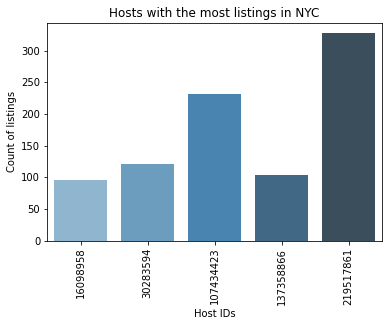

In [ ]:
viz=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz.set_title('Hosts with the most listings in NYC')
viz.set_ylabel('Count of listings')
viz.set_xlabel('Host IDs')
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)

In [ ]:
#comparing the value counts for 'neighbourhood_group'

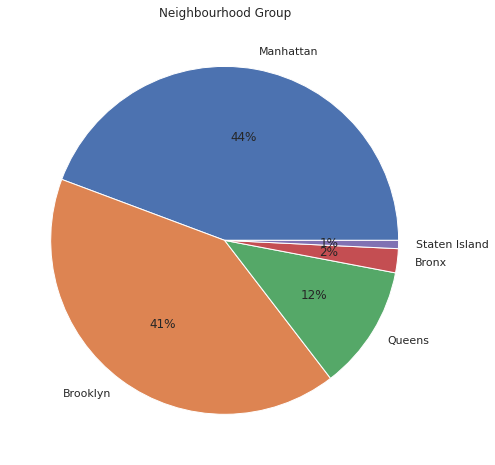

In [ ]:
plt.figure(figsize=(12,8))
plt.title("Neighbourhood Group")
chart= plt.pie(air_df['neighbourhood_group'].value_counts(), labels =air_df['neighbourhood_group'].value_counts().index, autopct='%.0f%%')
plt.show()

In [ ]:
#Deep learning of neighbourhood group by plotting a map by using latitudes and longitudes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



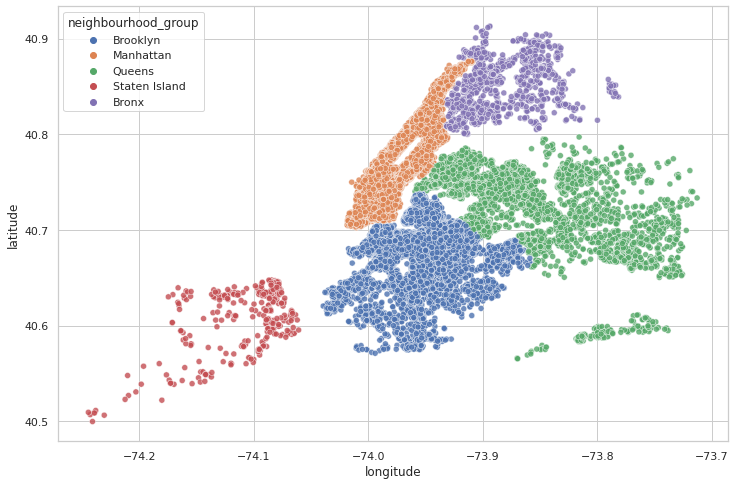

In [ ]:
from seaborn import palettes
fig=plt.gcf()
fig.set_size_inches(12,8)
sns.scatterplot(air_df['longitude'],air_df['latitude'],hue= air_df['neighbourhood_group'],alpha=0.8)
plt.show()

Neighbourhood group price distribution

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

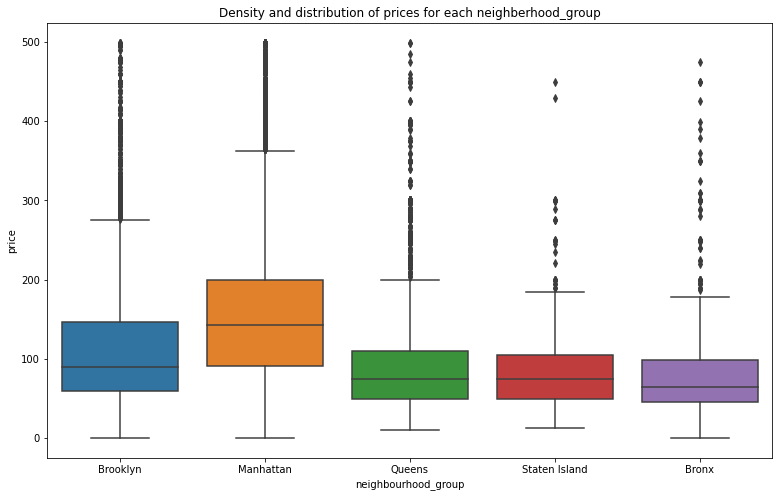

In [ ]:
ax=air_df[air_df.price<500]
plt.figure(figsize=(13,8))
viz_1=sns.boxplot(data=ax, x='neighbourhood_group',y='price')
viz_1.set_title('Density and distribution of prices for each neighberhood_group')

From above figure we got to know that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living.Manhattan has the highest range of prices for the listings with $150 price as average observation where as Bronx is cheapest among all.

In [ ]:
#as we saw earlier from unique values for neighbourhood there are way too many to concentrate on;
#therefore, let's grab just top 10 neighbourhoods that have the most listings in them

#finding out top 10 neighbourhoods
air_df.neighbourhood.value_counts().head(10)


Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

Room details

In [ ]:
#Type of room having highest share

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



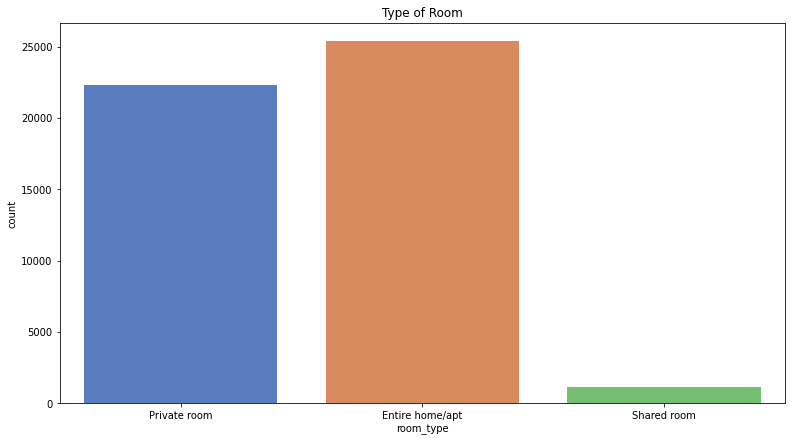

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(air_df.room_type, palette="muted")
fig = plt.gcf()
plt.show()

Room types occupied by a neighborhood group

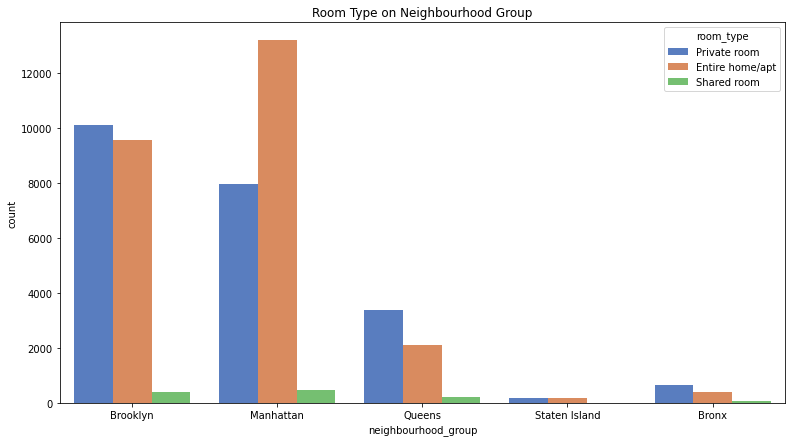

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(x=air_df.neighbourhood_group,hue=air_df.room_type, palette="muted")
plt.show()

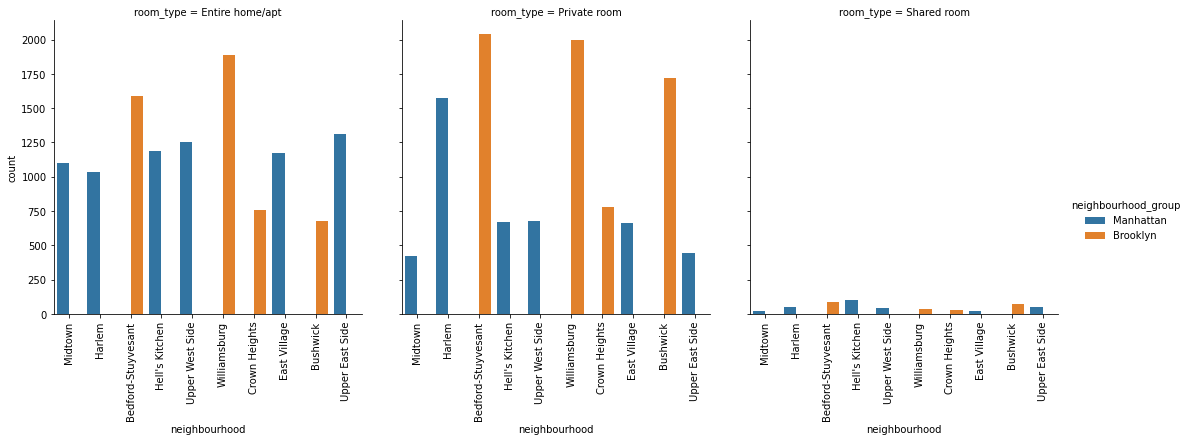

In [ ]:
#let's now combine this with neighbourhood and room type for a rich visualization we can make

#grabbing top 10 neighbourhoods for sub-dataframe
sub_1=air_df.loc[air_df['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_2=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_1, kind='count')
viz_2.set_xticklabels(rotation=90)

We can also observe that Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan, and Harlem for Brooklyn.

In [ ]:
#let's see how scatterplot will come out by using longtitude and latitude columns

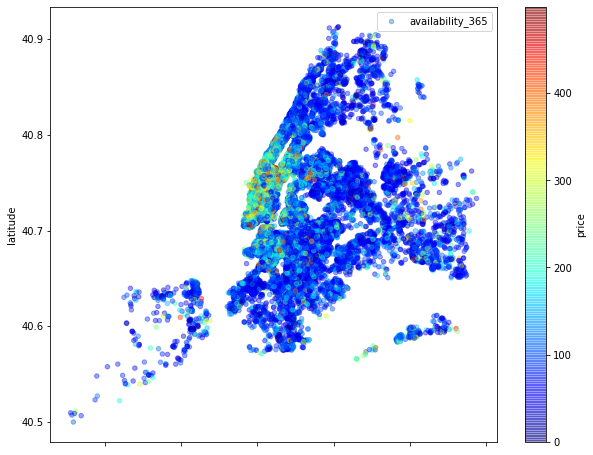

In [ ]:

ax_2=air_df[air_df.price<500].plot(kind='scatter', x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4,figsize=(10,8))
ax_2.legend()

plt.show()

In [ ]:
# let's see which neighbourhood group has highest availability for the rooms  

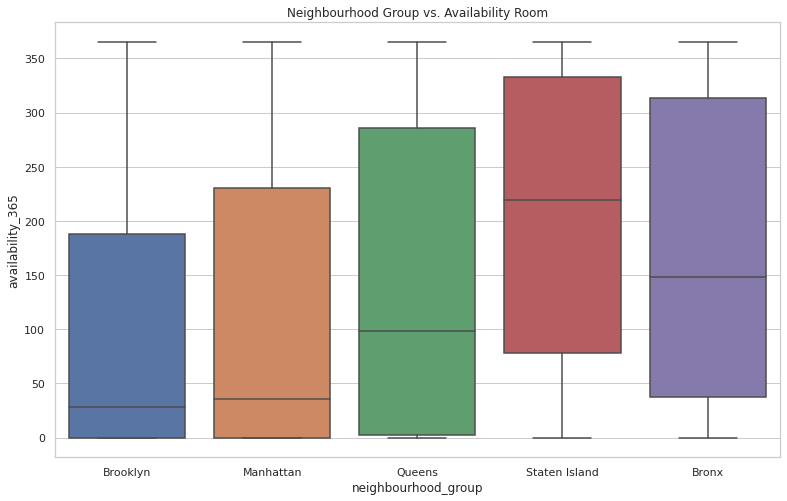

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(13,8))
plt.title('Neighbourhood Group vs. Availability Room')
sns.boxplot(data=air_df,x='neighbourhood_group',y='availability_365')
plt.show()

Also let’s check the correlation matrix to understand how are the features interrelated with each other. I have plotted using seaborn heatmap to understand the strength between the variables used.



In [ ]:
#ploting corelation between different volumns

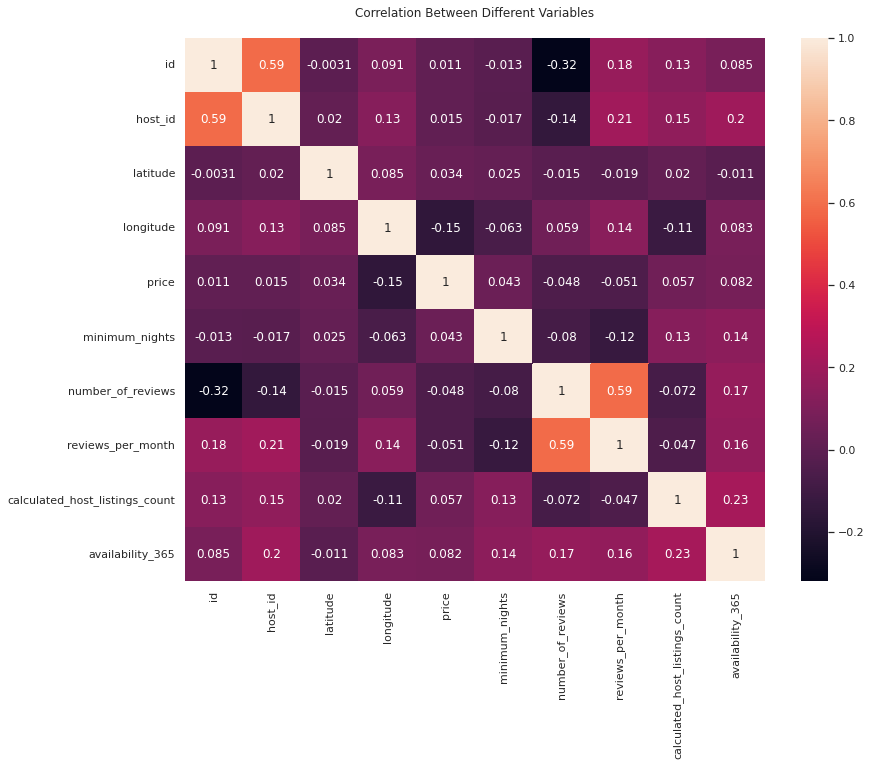

In [ ]:
corr = air_df.corr()
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
#last column we need to look at is 'number_of_reviews'

#let's grab 10 most reviewed listings in NYC
top_reviewed_listings=air_df.nlargest(10,'number_of_reviews')
top_reviewed_listings

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,903972,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,903947,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,891117,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,10101135,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,8168619,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,834190,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,16276632,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,3474320,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,166172,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [ ]:
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 65.4


From this table output, we can observe that top 10 most reviewed listings on Airbnb has price average of $65 